In [262]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [263]:
ROOT_DIR = 'output/preds/'

In [264]:
val_labels = np.load(str(ROOT_DIR) + 'validation_labels.npy')
val_dense_ones = np.load(str(ROOT_DIR) + 'validation_predictions_dense_ones.npy')
val_dense_multi = np.load(str(ROOT_DIR) + 'validation_predictions_dense_multi.npy')
val_cral_att1_ones = np.load(str(ROOT_DIR) + 'validation_predictions_cral_att1_ones.npy')
val_cral_att1_multi = np.load(str(ROOT_DIR) + 'validation_predictions_cral_att1_multi.npy')

#waiting
val_cral_att2_ones = np.load(str(ROOT_DIR) + 'validation_predictions_cral_att2_ones.npy')
val_cral_att2_multi = np.load(str(ROOT_DIR) + 'validation_predictions_cral_att2_multi.npy')

val_agcnn_global_ones = np.load(str(ROOT_DIR) + 'validation_predictions_global_agcnn_ones.npy')
val_agcnn_local_ones = np.load(str(ROOT_DIR) + 'validation_predictions_local_agcnn_ones.npy')
val_agcnn_fusion_ones = np.load(str(ROOT_DIR) + 'validation_predictions_fusion_agcnn_ones.npy')

val_agcnn_cral_global_ones = np.load(str(ROOT_DIR) + 'validation_predictions_global_agcnn_cral_multi.npy')
val_agcnn_cral_local_ones = np.load(str(ROOT_DIR) + 'validation_predictions_local_agcnn_cral_multi.npy')
val_agcnn_cral_fusion_ones = np.load(str(ROOT_DIR) + 'validation_predictions_fusion_agcnn_cral_multi.npy')

valid_df = pd.read_csv('valid.csv')

'''

def generate_preds_adjusted(valid_df, preds_df):
    
    class_names = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema'
                    ,'Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other'
                    ,'Fracture','Support Devices']

    class_names_preds = ['No_Finding_Pred', 'Enlarged_Cardiomediastinum_Pred', 'Cardiomegaly_Pred', 'Lung_Opacity_Pred', 'Lung_Lesion_Pred', 'Edema_Pred'
                    ,'Consolidation_Pred','Pneumonia_Pred','Atelectasis_Pred','Pneumothorax_Pred','Pleural_Effusion_Pred','Pleural_Other'
                    ,'Fracture_Pred','Support_Devices_Pred']

    valid_df['patient'] = valid_df['Path'].str.split('/').apply(lambda x: x[2])
    valid_df['study'] = valid_df['Path'].str.split('/').apply(lambda x: x[3])

    preds_df = pd.DataFrame(preds_df, columns = class_names_preds)
    valid_df_joined = pd.concat([valid_df, preds_df], axis=1)
    valid_df_joined = valid_df_joined.groupby(['patient','study'])[class_names + class_names_preds].max()
    test_labels = np.array(valid_df_joined.iloc[:,0:14])
    test_prob = np.array(valid_df_joined.iloc[:,14:28])
    
    return test_labels, test_prob


val_labels, val_dense_ones = generate_preds_adjusted(valid_df, val_dense_ones)
val_labels, val_dense_multi = generate_preds_adjusted(valid_df, val_dense_multi)

val_labels, val_cral_att1_ones = generate_preds_adjusted(valid_df, val_cral_att1_ones)
val_labels, val_cral_att1_multi = generate_preds_adjusted(valid_df, val_cral_att1_multi)

val_labels, val_cral_att2_ones = generate_preds_adjusted(valid_df, val_cral_att2_ones)
val_labels, val_cral_att2_multi = generate_preds_adjusted(valid_df, val_cral_att2_multi)

val_labels, val_agcnn_global_ones = generate_preds_adjusted(valid_df, val_agcnn_global_ones)
val_labels, val_agcnn_local_ones = generate_preds_adjusted(valid_df, val_agcnn_local_ones)
val_labels, val_agcnn_fusion_ones = generate_preds_adjusted(valid_df, val_agcnn_fusion_ones)

val_labels, val_agcnn_cral_global_ones = generate_preds_adjusted(valid_df, val_agcnn_cral_global_ones)
val_labels, val_agcnn_cral_local_ones = generate_preds_adjusted(valid_df, val_agcnn_cral_local_ones)
val_labels, val_agcnn_cral_fusion_ones = generate_preds_adjusted(valid_df, val_agcnn_cral_fusion_ones)
'''

FileNotFoundError: [Errno 2] No such file or directory: 'output/preds/validation_labels.npy'

In [265]:
val_agcnn_cral_global_ones.shape

(234, 14)

In [266]:
##AUC evaluation
def generate_auc_table(test_labels, test_prob):
    roc_auc_scores_list = []
    for i in range(0,14):
        if test_labels[:,i].sum(axis=0) > 0 and test_labels[:,i].sum(axis=0) <= 234:
            roc_auc_scores_list.append(roc_auc_score(test_labels[:,i], test_prob[:,i]))
            
    class_names = ['No_Finding', 'Enlarged_Cardiomediastinum', 'Cardiomegaly', 'Lung_Opacity', 'Lung_Lesion', 'Edema'
                    ,'Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural_Effusion','Pleural_Other'
                    ,'Support_Devices']

    auc_df = pd.DataFrame(list(zip(class_names, roc_auc_scores_list)), 
                   columns =['ClassName', 'AUC'])
    
    mean_auc = np.mean(auc_df['AUC'].values)
    print('AUC: ' + str(mean_auc))
    print(auc_df.head(14))
    return auc_df, mean_auc

In [243]:
val_ensemble = 0.3*val_cral_att1_multi + 0.3*val_cral_att2_multi + 0.4*val_agcnn_global_ones
ensemble_auc, ensemble_mean_auc = generate_auc_table(val_labels, val_ensemble)



AUC: 0.8220617181023255
                     ClassName       AUC
0                   No_Finding  0.891380
1   Enlarged_Cardiomediastinum  0.474422
2                 Cardiomegaly  0.820429
3                 Lung_Opacity  0.908657
4                  Lung_Lesion  0.497854
5                        Edema  0.932745
6                Consolidation  0.883612
7                    Pneumonia  0.783739
8                  Atelectasis  0.855763
9                 Pneumothorax  0.870022
10            Pleural_Effusion  0.927161
11               Pleural_Other  0.901288
12             Support_Devices  0.939731


In [220]:
dense_ones_auc, dense_ones_mean_auc = generate_auc_table(val_labels, val_dense_ones)

AUC: 0.7969311634123357
                     ClassName       AUC
0                   No_Finding  0.868824
1   Enlarged_Cardiomediastinum  0.522055
2                 Cardiomegaly  0.804040
3                 Lung_Opacity  0.902631
4                  Lung_Lesion  0.274678
5                        Edema  0.935215
6                Consolidation  0.889341
7                    Pneumonia  0.851770
8                  Atelectasis  0.810877
9                 Pneumothorax  0.835730
10            Pleural_Effusion  0.922960
11               Pleural_Other  0.811159
12             Support_Devices  0.930826


In [221]:
dense_multi_auc, dense_multi_auc_mean = generate_auc_table(val_labels, val_dense_multi)

AUC: 0.7937273926852101
                     ClassName       AUC
0                   No_Finding  0.847073
1   Enlarged_Cardiomediastinum  0.486826
2                 Cardiomegaly  0.801293
3                 Lung_Opacity  0.907922
4                  Lung_Lesion  0.360515
5                        Edema  0.921340
6                Consolidation  0.873059
7                    Pneumonia  0.683075
8                  Atelectasis  0.811607
9                 Pneumothorax  0.845133
10            Pleural_Effusion  0.924837
11               Pleural_Other  0.948498
12             Support_Devices  0.907278


In [244]:
cral_att1_ones_auc, cral_att1_ones_auc_mean = generate_auc_table(val_labels, val_cral_att1_ones)

AUC: 0.7898879520879659
                     ClassName       AUC
0                   No_Finding  0.865199
1   Enlarged_Cardiomediastinum  0.550165
2                 Cardiomegaly  0.793940
3                 Lung_Opacity  0.901896
4                  Lung_Lesion  0.227468
5                        Edema  0.925338
6                Consolidation  0.894618
7                    Pneumonia  0.762168
8                  Atelectasis  0.824188
9                 Pneumothorax  0.848451
10            Pleural_Effusion  0.925820
11               Pleural_Other  0.828326
12             Support_Devices  0.920965


In [204]:
cral_att1_multi_auc, cral_att1_multi_auc_mean = generate_auc_table(val_labels, val_cral_att1_multi)

AUC: 0.8000762745507864
                     ClassName       AUC
0                   No_Finding  0.935455
1   Enlarged_Cardiomediastinum  0.504010
2                 Cardiomegaly  0.792854
3                 Lung_Opacity  0.914819
4                  Lung_Lesion  0.231156
5                        Edema  0.929777
6                Consolidation  0.874814
7                    Pneumonia  0.736328
8                  Atelectasis  0.780587
9                 Pneumothorax  0.959622
10            Pleural_Effusion  0.926356
11               Pleural_Other  0.904523
12             Support_Devices  0.910691


In [246]:
cral_att2_ones_auc, cral_att2_ones_auc_mean = generate_auc_table(val_labels, val_cral_att2_ones)

AUC: 0.7938524748784735
                     ClassName       AUC
0                   No_Finding  0.862782
1   Enlarged_Cardiomediastinum  0.485945
2                 Cardiomegaly  0.782955
3                 Lung_Opacity  0.894768
4                  Lung_Lesion  0.407725
5                        Edema  0.932863
6                Consolidation  0.841399
7                    Pneumonia  0.737279
8                  Atelectasis  0.801786
9                 Pneumothorax  0.900996
10            Pleural_Effusion  0.927071
11               Pleural_Other  0.802575
12             Support_Devices  0.941938


In [247]:
cral_att2_multi_auc, cral_att2_multi_auc_mean = generate_auc_table(val_labels, val_cral_att2_multi)

AUC: 0.7869883323410213
                     ClassName       AUC
0                   No_Finding  0.867213
1   Enlarged_Cardiomediastinum  0.568807
2                 Cardiomegaly  0.760188
3                 Lung_Opacity  0.911082
4                  Lung_Lesion  0.201717
5                        Edema  0.934744
6                Consolidation  0.902759
7                    Pneumonia  0.751659
8                  Atelectasis  0.800487
9                 Pneumothorax  0.888274
10            Pleural_Effusion  0.913486
11               Pleural_Other  0.811159
12             Support_Devices  0.919273


In [248]:
val_agcnn_global_ones_auc, val_agcnn_global_ones_mean = generate_auc_table(val_labels, val_agcnn_global_ones)

AUC: 0.821199607752784
                     ClassName       AUC
0                   No_Finding  0.888426
1   Enlarged_Cardiomediastinum  0.466202
2                 Cardiomegaly  0.820695
3                 Lung_Opacity  0.901749
4                  Lung_Lesion  0.575107
5                        Edema  0.929806
6                Consolidation  0.876074
7                    Pneumonia  0.778208
8                  Atelectasis  0.856737
9                 Pneumothorax  0.815819
10            Pleural_Effusion  0.923228
11               Pleural_Other  0.905579
12             Support_Devices  0.937965


In [249]:
val_agcnn_fusion_ones_auc, val_agcnn_fusion_ones_auc_mean = generate_auc_table(val_labels, val_agcnn_fusion_ones)

AUC: 0.8079081409377374
                     ClassName       AUC
0                   No_Finding  0.878222
1   Enlarged_Cardiomediastinum  0.454679
2                 Cardiomegaly  0.791460
3                 Lung_Opacity  0.889036
4                  Lung_Lesion  0.502146
5                        Edema  0.934862
6                Consolidation  0.874114
7                    Pneumonia  0.790929
8                  Atelectasis  0.845049
9                 Pneumothorax  0.792588
10            Pleural_Effusion  0.923049
11               Pleural_Other  0.888412
12             Support_Devices  0.938259


In [250]:
val_agcnn_local_ones_auc, val_agcnn_local_ones_auc_mean = generate_auc_table(val_labels, val_agcnn_local_ones)

AUC: 0.7815240873004825
                     ClassName       AUC
0                   No_Finding  0.846536
1   Enlarged_Cardiomediastinum  0.427083
2                 Cardiomegaly  0.738838
3                 Lung_Opacity  0.853983
4                  Lung_Lesion  0.643777
5                        Edema  0.896061
6                Consolidation  0.825871
7                    Pneumonia  0.706305
8                  Atelectasis  0.793425
9                 Pneumothorax  0.745575
10            Pleural_Effusion  0.920904
11               Pleural_Other  0.845494
12             Support_Devices  0.915961


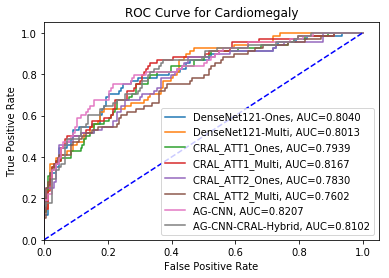

In [251]:
model_pred_list = [val_dense_ones, val_dense_multi, val_cral_att1_ones, val_cral_att1_multi,val_cral_att2_ones, val_cral_att2_multi, val_agcnn_global_ones, val_agcnn_cral_fusion_ones]
model_names = ['DenseNet121-Ones', 'DenseNet121-Multi', 'CRAL_ATT1_Ones', 'CRAL_ATT1_Multi', 'CRAL_ATT2_Ones', 'CRAL_ATT2_Multi','AG-CNN', 'AG-CNN-CRAL-Hybrid']
diease_index = 2

for i in range(0, len(model_names)):
    
    preds = model_pred_list[i]
    model_name = model_names[i]
    
    fpr, tpr, thresh = roc_curve(val_labels[:,diease_index], preds[:,diease_index])
    auc = roc_auc_score(val_labels[:,diease_index], model_pred_list[i][:,diease_index])
    plt.plot(fpr, tpr, label= str(model_name) + ', AUC='+ "{0:.4f}".format(auc))

plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cardiomegaly')
plt.legend(loc="lower right")
plt.legend()
plt.show()

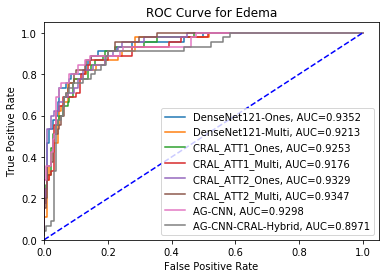

In [252]:
model_pred_list = [val_dense_ones, val_dense_multi, val_cral_att1_ones, val_cral_att1_multi,val_cral_att2_ones, val_cral_att2_multi, val_agcnn_global_ones, val_agcnn_cral_fusion_ones]
model_names = ['DenseNet121-Ones', 'DenseNet121-Multi', 'CRAL_ATT1_Ones', 'CRAL_ATT1_Multi', 'CRAL_ATT2_Ones', 'CRAL_ATT2_Multi','AG-CNN', 'AG-CNN-CRAL-Hybrid']
diease_index = 5

for i in range(0, len(model_names)):
    
    preds = model_pred_list[i]
    model_name = model_names[i]
    
    fpr, tpr, thresh = roc_curve(val_labels[:,diease_index], preds[:,diease_index])
    auc = roc_auc_score(val_labels[:,diease_index], model_pred_list[i][:,diease_index])
    plt.plot(fpr, tpr, label= str(model_name) + ', AUC='+ "{0:.4f}".format(auc))

plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Edema')
plt.legend(loc="lower right")
plt.legend()
plt.show()

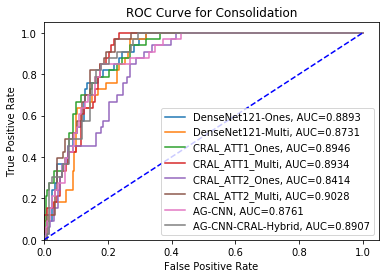

In [253]:
model_pred_list = [val_dense_ones, val_dense_multi, val_cral_att1_ones, val_cral_att1_multi,val_cral_att2_ones, val_cral_att2_multi, val_agcnn_global_ones, val_agcnn_cral_fusion_ones]
model_names = ['DenseNet121-Ones', 'DenseNet121-Multi', 'CRAL_ATT1_Ones', 'CRAL_ATT1_Multi', 'CRAL_ATT2_Ones', 'CRAL_ATT2_Multi','AG-CNN', 'AG-CNN-CRAL-Hybrid']
diease_index = 6

for i in range(0, len(model_names)):
    
    preds = model_pred_list[i]
    model_name = model_names[i]
    
    fpr, tpr, thresh = roc_curve(val_labels[:,diease_index], preds[:,diease_index])
    auc = roc_auc_score(val_labels[:,diease_index], model_pred_list[i][:,diease_index])
    plt.plot(fpr, tpr, label= str(model_name) + ', AUC='+ "{0:.4f}".format(auc))

plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Consolidation')
plt.legend(loc="lower right")
plt.legend()
plt.show()

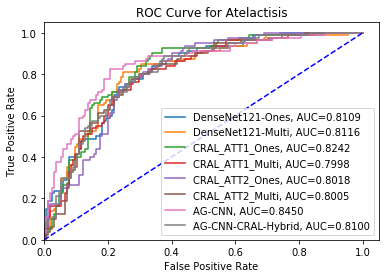

In [254]:
model_pred_list = [val_dense_ones, val_dense_multi, val_cral_att1_ones, val_cral_att1_multi,val_cral_att2_ones, val_cral_att2_multi, val_agcnn_fusion_ones, val_agcnn_cral_global_ones]
model_names = ['DenseNet121-Ones', 'DenseNet121-Multi', 'CRAL_ATT1_Ones', 'CRAL_ATT1_Multi', 'CRAL_ATT2_Ones', 'CRAL_ATT2_Multi','AG-CNN', 'AG-CNN-CRAL-Hybrid']
diease_index = 8

for i in range(0, len(model_names)):
    
    preds = model_pred_list[i]
    model_name = model_names[i]
    
    fpr, tpr, thresh = roc_curve(val_labels[:,diease_index], preds[:,diease_index])
    auc = roc_auc_score(val_labels[:,diease_index], model_pred_list[i][:,diease_index])
    plt.plot(fpr, tpr, label= str(model_name) + ', AUC='+ "{0:.4f}".format(auc))

plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Atelactisis')
plt.legend(loc="lower right")
plt.legend()

plt.show()

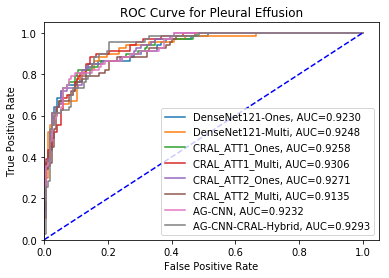

In [255]:
model_pred_list = [val_dense_ones, val_dense_multi, val_cral_att1_ones, val_cral_att1_multi,val_cral_att2_ones, val_cral_att2_multi, val_agcnn_global_ones, val_agcnn_cral_fusion_ones]
model_names = ['DenseNet121-Ones', 'DenseNet121-Multi', 'CRAL_ATT1_Ones', 'CRAL_ATT1_Multi', 'CRAL_ATT2_Ones', 'CRAL_ATT2_Multi','AG-CNN', 'AG-CNN-CRAL-Hybrid']
diease_index = 10

for i in range(0, len(model_names)):
    
    preds = model_pred_list[i]
    model_name = model_names[i]
    
    fpr, tpr, thresh = roc_curve(val_labels[:,diease_index], preds[:,diease_index])
    auc = roc_auc_score(val_labels[:,diease_index], model_pred_list[i][:,diease_index])
    plt.plot(fpr, tpr, label= str(model_name) + ', AUC='+ "{0:.4f}".format(auc))

plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Pleural Effusion')
plt.legend(loc="lower right")
plt.show()

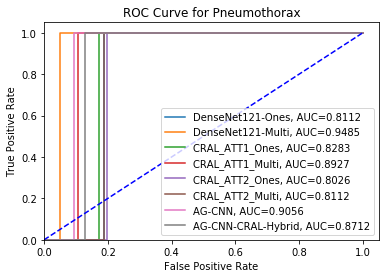

In [256]:
model_pred_list = [val_dense_ones, val_dense_multi, val_cral_att1_ones, val_cral_att1_multi,val_cral_att2_ones, val_cral_att2_multi, val_agcnn_global_ones, val_agcnn_cral_fusion_ones]
model_names = ['DenseNet121-Ones', 'DenseNet121-Multi', 'CRAL_ATT1_Ones', 'CRAL_ATT1_Multi', 'CRAL_ATT2_Ones', 'CRAL_ATT2_Multi','AG-CNN', 'AG-CNN-CRAL-Hybrid']
diease_index = 11

for i in range(0, len(model_names)):
    
    preds = model_pred_list[i]
    model_name = model_names[i]
    
    fpr, tpr, thresh = roc_curve(val_labels[:,diease_index], preds[:,diease_index])
    auc = roc_auc_score(val_labels[:,diease_index], model_pred_list[i][:,diease_index])
    plt.plot(fpr, tpr, label= str(model_name) + ', AUC='+ "{0:.4f}".format(auc))

plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Pneumothorax')
plt.legend(loc="lower right")
plt.show()